In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.optimize import differential_evolution
from sklearn.decomposition import IncrementalPCA
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def find_two_similar_vectors(vectors_array):
    for i_v, vector in enumerate(vectors_array):
        max_cosine, max_i_av = 0, 0
        for i_av, another_vector in enumerate(vectors_array):
            if i_v == i_av:
                pass
            else:
                cosine = np.dot(vector, another_vector) / np.linalg.norm(vector) / np.linalg.norm(another_vector)
                if cosine > max_cosine:
                    max_cosine = cosine
                    max_i_av = i_av
        print(f'Вектор {i_v} похож на вектор {max_i_av} с углом {max_cosine}')
            
find_two_similar_vectors(raitings)

Вектор 0 похож на вектор 8 с углом 0.9106598233573043
Вектор 1 похож на вектор 4 с углом 0.8713805223930228
Вектор 2 похож на вектор 9 с углом 0.9187305147356807
Вектор 3 похож на вектор 9 с углом 0.8588686958710952
Вектор 4 похож на вектор 8 с углом 0.8794847716076252
Вектор 5 похож на вектор 9 с углом 0.8551490764118892
Вектор 6 похож на вектор 3 с углом 0.8327421070557631
Вектор 7 похож на вектор 5 с углом 0.8445168512565342
Вектор 8 похож на вектор 0 с углом 0.9106598233573044
Вектор 9 похож на вектор 2 с углом 0.9187305147356807


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
ipca = IncrementalPCA(n_components=5, batch_size=len(raitings))
ipca.fit(raitings)
raitings_tranformed = ipca.transform(raitings)
raitings_tranformed

array([[ 5.30986101,  1.92919845,  4.93300027, -2.70188013, -5.50497886],
       [-2.87763403,  2.71659559, -1.40592782, -7.26325751,  4.50322291],
       [ 4.94010408, -6.68861167,  0.94550184, -3.61556661,  0.68969272],
       [-5.14939908, -6.28027284,  4.65978558, -1.09024004,  1.01471112],
       [ 1.37488691,  7.54357985, -4.00834369, -2.1284001 ,  0.16324949],
       [-2.65341956, -3.77075601, -8.58430748,  1.46628319, -1.67401769],
       [-8.61573944,  3.78603335,  4.02721027,  4.37582577,  3.13880277],
       [-5.39658258, -1.0170466 , -1.01456742,  1.89512837, -6.54883538],
       [ 5.7843488 ,  5.29857107,  1.48083611,  3.71295542, -0.21312695],
       [ 7.2835739 , -3.51729118, -1.03318766,  5.34915166,  4.43127987]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

Функция: (sin(x) + cos(2*x + 3))*tan(x**2)
Первая производная: 2*x*(sin(x) + cos(2*x + 3))*(tan(x**2)**2 + 1) + (-2*sin(2*x + 3) + cos(x))*tan(x**2)
Первая производная с x = 1: 0


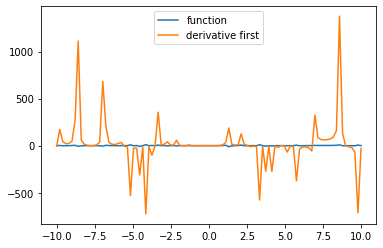


На бумаге:
tan(x**2) * (sin(x) + cos(2*x + 3))
tan(x**2)' * (sin(x) + cos(2*x + 3)) + tan(x**2) * (sin(x) + cos(2*x + 3))'
2*x*(tan(x**2)**2 + 1) * (sin(x) + cos(2*x + 3)) + tan(x**2) * (cos(x) - 2*sin(2*x + 3))'



In [5]:
x, y = symbols('x y')

def function(x):
    return tan(x**2) * (sin(x) + cos(2*x + 3))

print(f'Функция: {function(x)}')
print(f'Первая производная: {diff(function(x))}')
print(f'Первая производная с x = 1: {diff(function(1))}')

xf = np.linspace(-10, 10, 100)
yf = [function(xf[i]) for i in range(len(xf))]
ydf1 = [derivative(function, xf[i], dx=1e-6, n=1) for i in range(len(xf))]
plt.plot(xf, yf, label='function')
plt.plot(xf, ydf1, label='derivative first')
plt.legend()
plt.show()

print('''
На бумаге:
tan(x**2) * (sin(x) + cos(2*x + 3))
tan(x**2)' * (sin(x) + cos(2*x + 3)) + tan(x**2) * (sin(x) + cos(2*x + 3))'
2*x*(tan(x**2)**2 + 1) * (sin(x) + cos(2*x + 3)) + tan(x**2) * (cos(x) - 2*sin(2*x + 3))'
''')

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

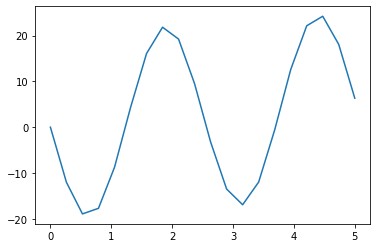

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

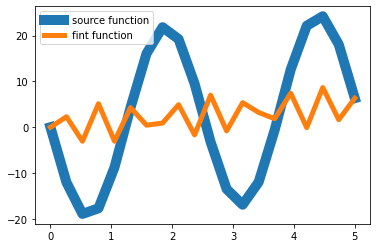

In [11]:
# Варинат 1
a, b = minimize(error, np.array([-10.0, 10.0]), method='nelder-mead', options={'xtol': 1e-6}).x
fx_finded = np.array([])
for _ in x:
    fx_finded = np.append(fx_finded, f(_, a, b))
plt.plot(x, fx, label='source function', linewidth=10)
plt.plot(x, fx_finded, label='fint function', linewidth=5)
plt.legend()
plt.show()

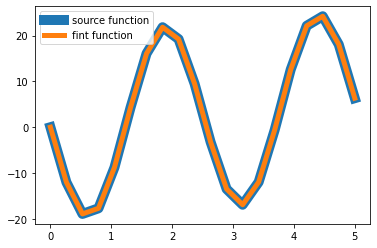

In [12]:
# Вариант 2
a, b = differential_evolution(error, [(-3.0, 3.0), (-3.0, 3.0)], seed=42, strategy='best1bin').x
fx_finded = np.array([])
for _ in x:
    fx_finded = np.append(fx_finded, f(_, a, b))
plt.plot(x, fx, label='source function', linewidth=10)
plt.plot(x, fx_finded, label='fint function', linewidth=5)
plt.legend()
plt.show()

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

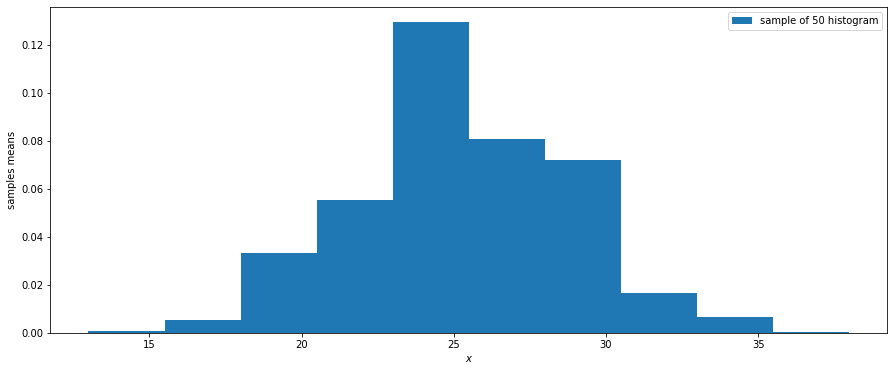

In [13]:
def get_CLT_data(size, p, n, cases):
    plt.figure(figsize=(15, 6))
    means_array = np.array([])
    for _ in range(cases):
        means_array = np.append(means_array, np.random.choice(sts.binom.rvs(size=size, n=n, p=p), n))
    plt.hist(means_array, density=True, label='sample of ' + str(n) + ' histogram', bins=10)
    plt.legend()
    plt.ylabel('samples means')
    plt.xlabel('$x$')

get_CLT_data(20, 0.5, 50, 1000)

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [14]:
m = np.array([[1, 4], [1, 1], ])
print('Матрица: \n', m)
wm, vm = np.linalg.eig(m)
print('Собственные значения: \n', wm)
print('Вектора: \n', vm)
print(f'''
На бумаге:
1) Собственные числа
[[1, 4], [1, 1], ]
(1 - lambda) * (1 - lambda) - 4 * 1 = 0
lambda2 - 2lambda - 3 = 0
lambda1 = 3, проверка: 9 - 6 - 3 = 0
lambda2 = -1, проверка: 1 + 2 - 3 = 0

2) Собственные ветора
lambda1 = 3
-2x + 4y = 0 => x = 2y => если y = √5/5 (0.447213595499958), тогда x = 2 * √5/5 = 0.894427190999916
x - 2y = 0 => x = 2y => если y = √5/5 (0.447213595499958), тогда x = 2 * √5/5 = 0.894427190999916
Проверка:
{-2 * (2*5**(1/2)) / 5 + 4 * (5**(1/2)) / 5}
{(2 * 5**(1/2)) / 5 - 2 * (5**(1/2)) / 5}

lambda2 = -1
2x + 4y = 0 => х = -2y => если y = √5/5 (0.447213595499958), тогда x = -2 * √5/5 = -0.894427190999916
x + 2y = 0 => x = -2y => если y = √5/5 (0.447213595499958), тогда x = -2 * √5/5 = -0.894427190999916
Проверка:
{2 * (-2*5**(1/2)) / 5 + 4 * (5**(1/2)) / 5}
{(-2 * 5**(1/2)) / 5 + 2 * (5**(1/2)) / 5}
''')


Матрица: 
 [[1 4]
 [1 1]]
Собственные значения: 
 [ 3. -1.]
Вектора: 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]

На бумаге:
1) Собственные числа
[[1, 4], [1, 1], ]
(1 - lambda) * (1 - lambda) - 4 * 1 = 0
lambda2 - 2lambda - 3 = 0
lambda1 = 3, проверка: 9 - 6 - 3 = 0
lambda2 = -1, проверка: 1 + 2 - 3 = 0

2) Собственные ветора
lambda1 = 3
-2x + 4y = 0 => x = 2y => если y = √5/5 (0.447213595499958), тогда x = 2 * √5/5 = 0.894427190999916
x - 2y = 0 => x = 2y => если y = √5/5 (0.447213595499958), тогда x = 2 * √5/5 = 0.894427190999916
Проверка:
0.0
0.0

lambda2 = -1
2x + 4y = 0 => х = -2y => если y = √5/5 (0.447213595499958), тогда x = -2 * √5/5 = -0.894427190999916
x + 2y = 0 => x = -2y => если y = √5/5 (0.447213595499958), тогда x = -2 * √5/5 = -0.894427190999916
Проверка:
0.0
0.0

